In [2]:
import pandas as pd

data = pd.read_csv('supervised_clustering_data_with_shap.csv')

In [3]:
data.columns

Index(['Cluster', 'f(x)', 'age', 'sacVolume', 'sacSurfaceArea', 'vdcVolume',
       'vdcSurfaceArea', 'sacSectionArea', 'ellipsoidVolume',
       'ellipsoidMaxSemiaxis', 'ellipsoidMidSemiaxis', 'ellipsoidMinSemiaxis',
       'sacCenterlineLength', 'ostiumSectionArea', 'ostiumSectionPerimeter',
       'ostiumMinSize', 'ostiumMaxSize', 'ostiumShapeFactor',
       'aspectRatio_star', 'sizeRatio_star', 'vesselDiameter',
       'neckVesselAngle', 'sacVesselAngle', 'meanRadius', 'meanCurvature',
       'meanTorsion', 'tortuosity', 'minRadius', 'maxRadius', 'maxCurvature',
       'maxTorsion', 'bifurcationAngleInPlane', 'bifurcationAngleOutOfPlane',
       'aneurysmLocation_MCA', 'aneurysmType_TER', 'aneurysmLocation',
       'aneurysmType', 'age.1', 'sacVolume.1', 'sacSurfaceArea.1',
       'vdcVolume.1', 'vdcSurfaceArea.1', 'sacSectionArea.1',
       'ellipsoidVolume.1', 'ellipsoidMaxSemiaxis.1', 'ellipsoidMidSemiaxis.1',
       'ellipsoidMinSemiaxis.1', 'sacCenterlineLength.1',
       'ost

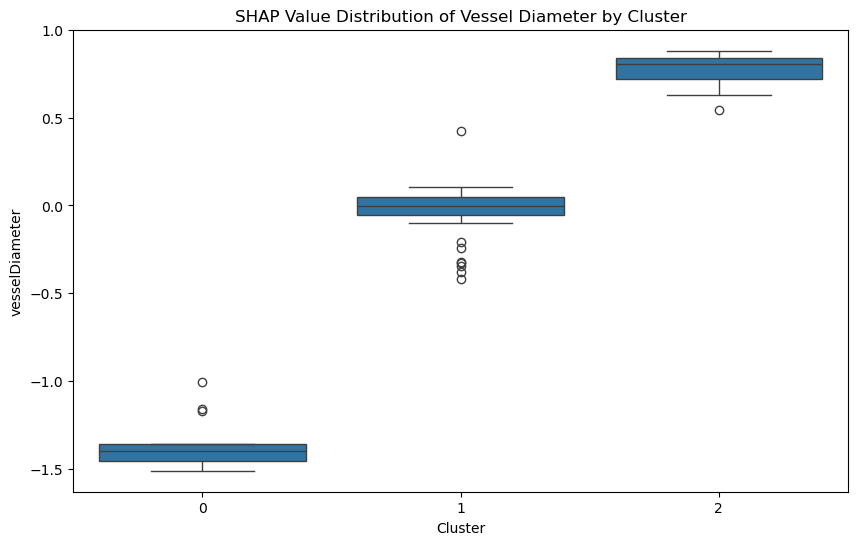

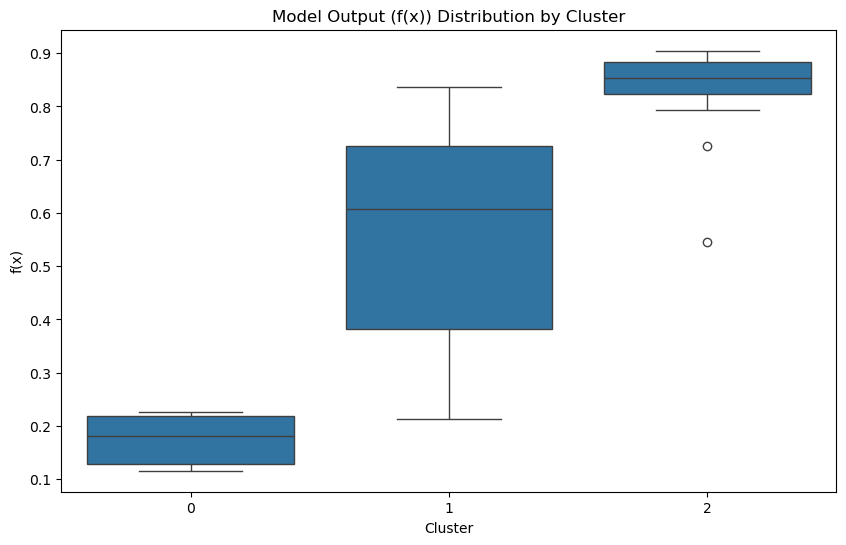

Cluster 2:
Cluster            2.000000
f(x)               0.836585
vesselDiameter     0.776844
neckVesselAngle    0.081077
sacSectionArea     0.106993
dtype: float64
Cluster 1:
Cluster            1.000000
f(x)               0.559753
vesselDiameter    -0.020021
neckVesselAngle   -0.002403
sacSectionArea    -0.038590
dtype: float64
Cluster 0:
Cluster            0.000000
f(x)               0.171554
vesselDiameter    -1.357327
neckVesselAngle   -0.133367
sacSectionArea    -0.004981
dtype: float64


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Simplify the dataset
selected_columns = ['Cluster', 'f(x)', 'vesselDiameter', 'neckVesselAngle', 'sacSectionArea']
df_simplified = data[selected_columns]

# Step 2: Summarize cluster characteristics
cluster_summary = df_simplified.groupby('Cluster').mean()

# Step 3: Visualize SHAP value distributions by cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_simplified, x='Cluster', y='vesselDiameter')
plt.title('SHAP Value Distribution of Vessel Diameter by Cluster')
plt.show()

# Step 4: Compare f(x) by cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_simplified, x='Cluster', y='f(x)')
plt.title('Model Output (f(x)) Distribution by Cluster')
plt.show()

# Step 5: Link clusters to SHAP values
for cluster in df_simplified['Cluster'].unique():
    print(f"Cluster {cluster}:")
    cluster_data = df_simplified[df_simplified['Cluster'] == cluster]
    mean_shap = cluster_data.mean()
    print(mean_shap)

# Step 6: Visualize specific samples (Optional)
# Use SHAP library for force plots


ValueError: x and y must have same first dimension, but have shapes (103,) and (70,)

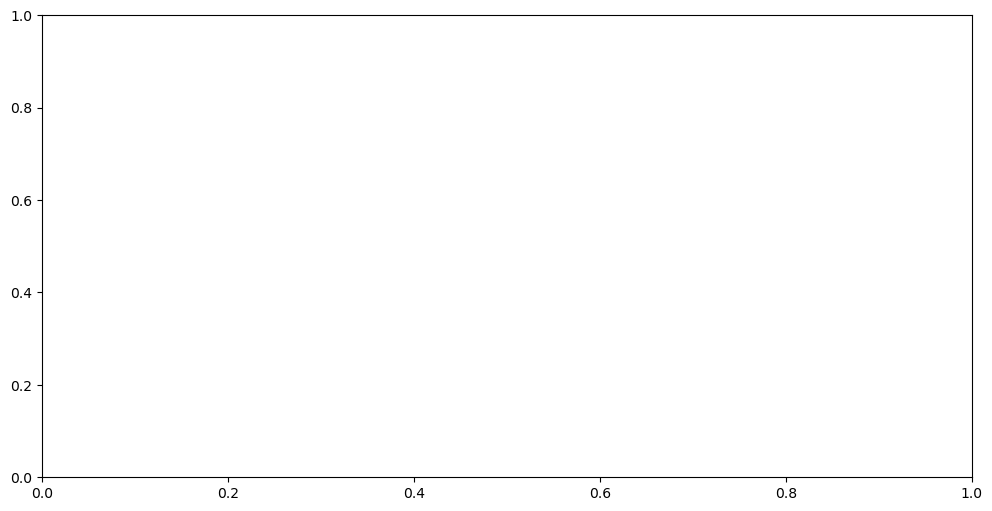

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Assume `data` is your DataFrame
# Sort by f(x)
data_sorted = data.sort_values(by='f(x)').reset_index()

# Assign colors by cluster
cluster_colors = {0: 'blue', 1: 'pink', 2: 'red'}
colors = data_sorted['Cluster'].map(cluster_colors)

# Create layered plot
plt.figure(figsize=(12, 6))
for i in range(len(data_sorted)):
    plt.plot(data_sorted.index, data_sorted.iloc[i, 2:-1], color=colors.iloc[i], alpha=0.6)

# Add vertical cluster zones
plt.axvspan(0, 30, color='blue', alpha=0.1, label='Cluster 0')
plt.axvspan(30, 70, color='pink', alpha=0.1, label='Cluster 1')
plt.axvspan(70, 100, color='red', alpha=0.1, label='Cluster 2')

# Label axes and title
plt.xlabel('Samples Ordered by f(x)')
plt.ylabel('SHAP Contribution')
plt.title('Cluster-Linked SHAP Visualization')
plt.legend()
plt.show()


In [8]:
import pyvista as pv

# Load the surface model
surface = pv.read("model.stl")  # or model.vtp

# Load the centerline
centerline = pv.read("centerlines.vtp")

# Plot both together
plotter = pv.Plotter()
plotter.add_mesh(surface, color="lightblue", opacity=0.7, label="Surface")
plotter.add_mesh(centerline, color="red", line_width=3, label="Centerline")
plotter.add_legend()
plotter.show()


FileNotFoundError: File (C:\Users\shrin\OneDrive\Documents\GitHub\Intracranial-Aneurysm-Predictor-\model.stl) not found